In [3]:
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

def time_to_maturity(t0,T,y=252): #잔존만기 계산
    return (np.busday_count(t0,T)/y)


def call_price(S,K,ttm,r,sigma):
    #기조자산 가격(S), 행사가격(K), 잔존만기(ttm), 이자율(r), 변동성(sigma)
    d1 = (np.log(S/K)+(r+sigma**2*0.5)*ttm)/(sigma*np.sqrt(ttm))
    d2 = (np.log(S/K)+(r-sigma**2*0.5)*ttm)/(sigma*np.sqrt(ttm))
    val = (S*stats.norm.cdf(d1,0.0,1.0))-K*np.exp(-r*ttm)*stats.norm.cdf(d2,0.0,1.0)
    return val
def put_price(S,K,ttm,r,sigma):
    d1 = (np.log(S/K)+(r+sigma**2*0.5)*ttm)/(sigma*np.sqrt(ttm))
    d2 = (np.log(S/K)+(r-sigma**2*0.5)*ttm)/(sigma*np.sqrt(ttm))
    val = K*np.exp(-r*ttm)*stats.norm.cdf(-d2,0.0,1.0)-(S*stats.norm.cdf(-d1,0.0,1.0))
    return val

ttm = time_to_maturity('2018-09-01', '2018-12-14')
r=0.005
sigma=0.1919

call_price(289.84,290,32/252,r,sigma)

7.9172869268140005

In [2]:
#기초자산 및 행사가격 변화에 따른 콜옵션가격 변화
call_space=dict()
S=np.arange(200,400,10)   #행사가격의 변화 200->400까지 10씩 증가
for s in S:
    call_space[s]=call_price(s,300,ttm,r,sigma)
call_space

{200: 1.8229865417689555e-06,
 210: 3.7243325229619016e-05,
 220: 0.0004848219345010875,
 230: 0.0042640947867984835,
 240: 0.02665577204552605,
 250: 0.12380641693770844,
 260: 0.44438348272742445,
 270: 1.2768817597123174,
 280: 3.032518983510599,
 290: 6.129007185638784,
 300: 10.826711396969444,
 310: 17.12542427826159,
 320: 24.78644022660987,
 330: 33.44839060274677,
 340: 42.75369718631481,
 350: 52.42501910316514,
 360: 62.28260578675133,
 370: 72.22579369772768,
 380: 82.20481472928111,
 390: 92.19760562684911}

In [3]:
call_space=dict()
K=np.arange(250,350,10)
S=np.arange(200,400,10)
for k in K:
    single_space=dict()
    for s in S:
        single_space[s] = call_price(s,k,ttm,r,sigma)
    call_space[k]=pd.Series(single_space)
df_call_space = pd.DataFrame(call_space)
df_call_space

,250,260,270,280,290,300,310,320,330,340
200,0.022213,0.004304,0.000730,0.000110,0.000015,0.000002,2.051670e-07,2.137537e-08,2.078843e-09,1.901492e-10
210,0.135833,0.033756,0.007326,0.001405,0.000241,0.000037,5.257695e-06,6.833560e-07,8.245959e-08,9.308611e-09
220,0.579058,0.180484,0.049127,0.011791,0.002521,0.000485,8.468891e-05,1.355684e-05,2.005285e-06,2.761759e-07
230,1.825802,0.697475,0.233416,0.068909,0.018096,0.004264,9.096275e-04,1.771610e-04,3.175612e-05,5.278307e-06
240,4.488751,2.051631,0.826890,0.294930,0.093641,0.026656,6.855433e-03,1.605359e-03,3.449005e-04,6.847559e-05
250,9.022259,4.811862,2.285869,0.966895,0.365220,0.123806,3.789918e-02,1.054734e-02,2.687044e-03,6.309106e-04
260,15.466104,9.383150,5.137706,2.527836,1.117045,0.444383,1.598281e-01,5.224992e-02,1.561818e-02,4.294832e-03
270,23.460286,15.793869,9.744040,5.466003,2.776908,1.276882,5.324374e-01,2.020632e-01,7.011863e-02,2.236542e-02
280,32.478630,23.714323,16.123890,10.104931,5.796508,3.032519,1.445938e+00,6.293300e-01,2.508041e-01,9.189374e-02
290,42.059513,32.658000,23.974387,16.455946,10.465821,6.129007,3.294155e+00,1.623750e+00,7.349539e-01,3.062803e-01


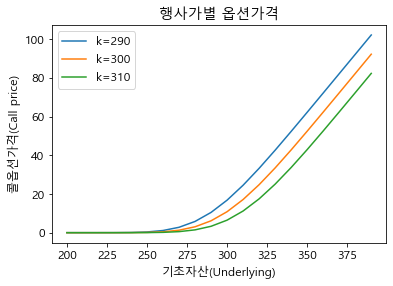

In [4]:
#콜옵션가격 그래프 그리기
plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['font.size']=12
plt.rcParams['axes.unicode_minus']=False

fig = plt.figure()
ax = fig.add_subplot(1,1,1) #서브플롯
ax.plot(df_call_space[290], label='k=290') #k=290일때 그래프
ax.plot(df_call_space[300], label='k=300')
ax.plot(df_call_space[310], label='k=310')
ax.set_xlabel('기초자산(Underlying)')
ax.set_ylabel('콜옵션가격(Call price)')
ax.set_title('행사가별 옵션가격')
ax.legend(loc='best')

In [5]:
S=np.arange(200,400,10)
K=np.arange(250,350,5)
put_price(S,K,ttm,r,sigma)


array([48.19361601, 43.20375123, 38.2787427 , 33.47174323, 28.85200536,
       24.49676323, 20.47980708, 16.86035452, 13.67533536, 10.9365497 ,
        8.63239483,  6.73272239,  5.19506721,  3.97077015,  3.01006305,
        2.26572797,  1.69534177,  1.26234269,  0.93623709,  0.69225373])

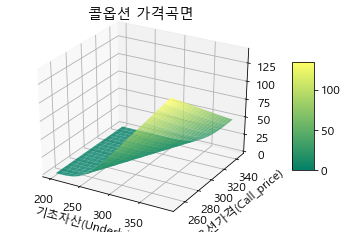

In [6]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

S=np.arange(200,400,10)
K=np.arange(250,350,5)
K,S=np.meshgrid(K,S) #매트릭스 만들기
Z_c=call_price(S,K,ttm,r,sigma)

fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')

surf_c =ax.plot_surface(S,K,Z_c, cmap=cm.summer,linewidth=1, antialiased=True, alpha=0.8) 


ax.set_xlabel('기초자산(Underlying)')
ax.set_ylabel('콜옵션가격(Call_price)')
ax.set_title('콜옵션 가격곡면')

fig.colorbar(surf_c,shrink=0.5,aspect=5)


Text(0.5, 0.92, '풋옵션 가격곡면')

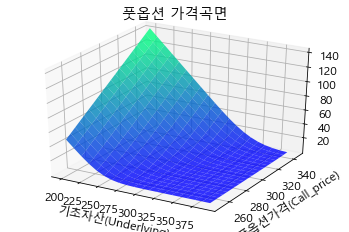

In [7]:
Z_p=put_price(S,K,ttm,r,sigma)
fig=plt.figure()
ax2=fig.add_subplot(111, projection='3d')

surf_p = ax2.plot_surface(S,K,Z_p, cmap=cm.winter,linewidth=1, antialiased=True, alpha=0.8)

ax2.set_xlabel('기초자산(Underlying)')
ax2.set_ylabel('풋옵션가격(Call_price)')
ax2.set_title('풋옵션 가격곡면')
